# Import Libraries

In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [364]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [366]:
round(df.describe(), 2) 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [367]:
round(df.describe(exclude=['float', 'int64']), 2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [368]:
# Check data types of each column
data_types = df.dtypes
print("Data types of each column:\n", data_types)

Data types of each column:
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [369]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [370]:
print((df.isna().sum()/len(df))*100)


id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [371]:
# Check unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    unique_values = df[col].nunique()
    print(f"Number of unique values in {col}: {unique_values}")

Number of unique values in gender: 3
Number of unique values in ever_married: 2
Number of unique values in work_type: 5
Number of unique values in Residence_type: 2
Number of unique values in smoking_status: 4


In [372]:
# Distribution of categorical features
for col in categorical_columns:
    value_counts = df[col].value_counts()
    print(f"Distribution of values in {col}:\n{value_counts}\n")

Distribution of values in gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Distribution of values in ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64

Distribution of values in work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Distribution of values in Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

Distribution of values in smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



In [373]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Display duplicates if any
if duplicate_rows > 0:
    print("Duplicate rows:\n", df[df.duplicated()])

Number of duplicate rows: 0


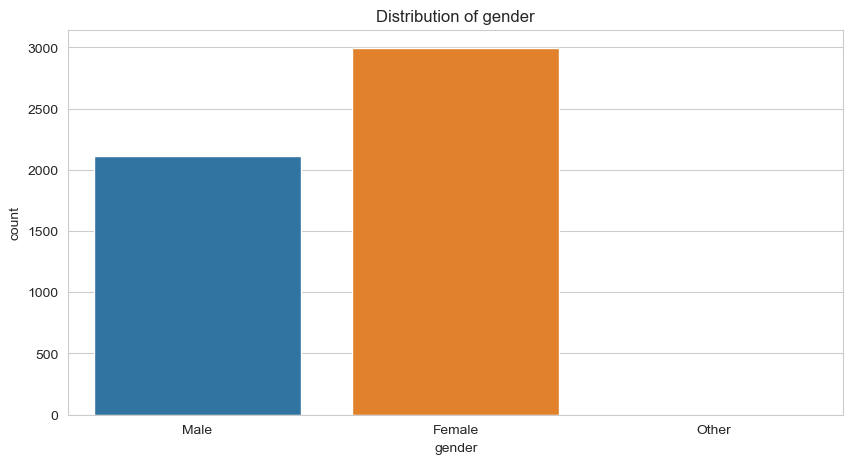

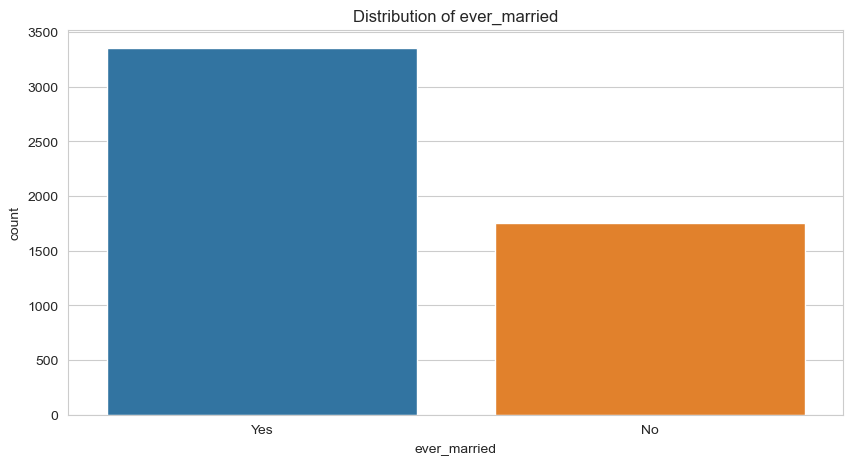

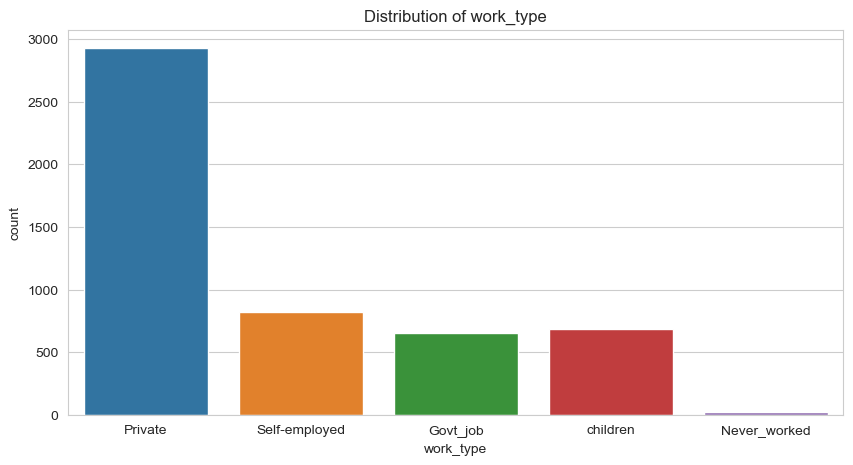

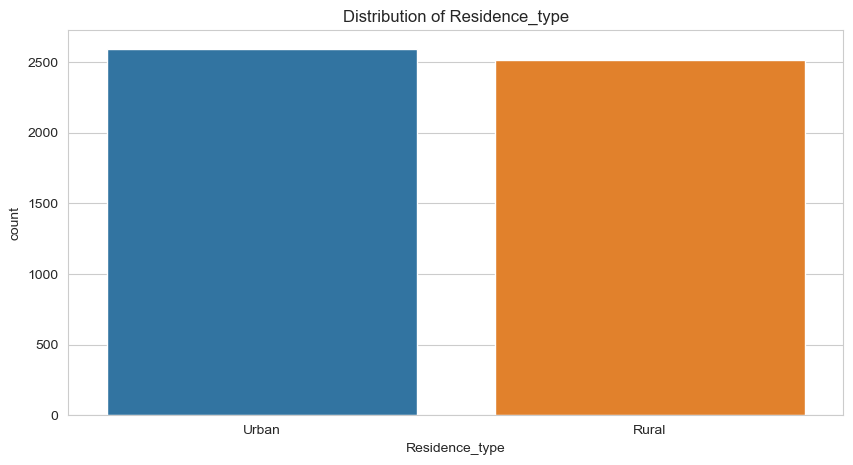

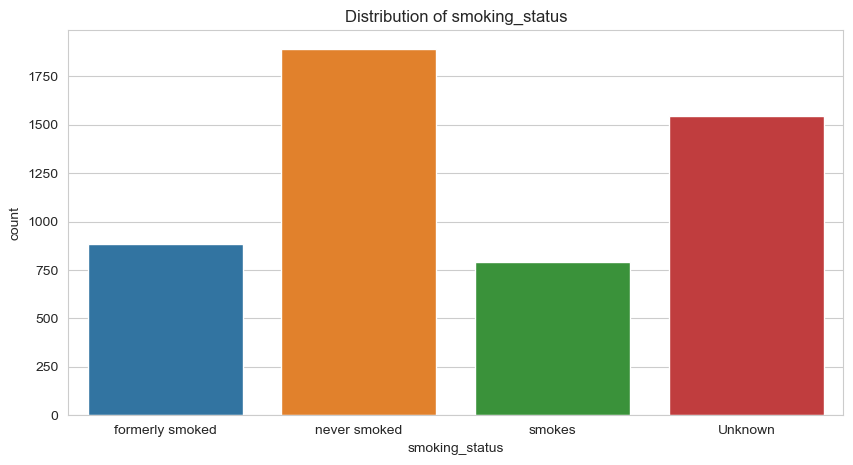

In [374]:
# Visualize distribution for categorical features
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()    

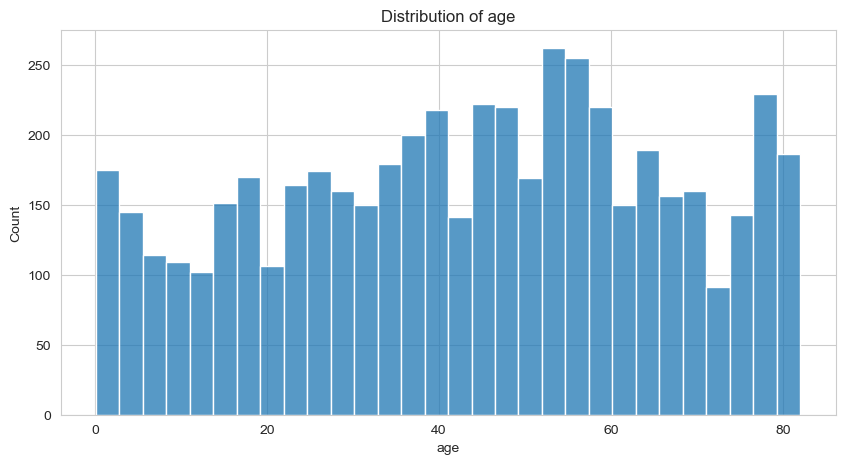

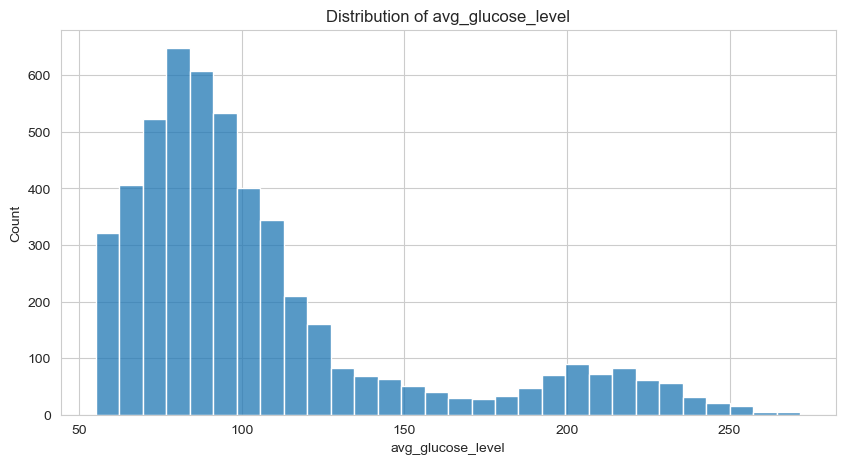

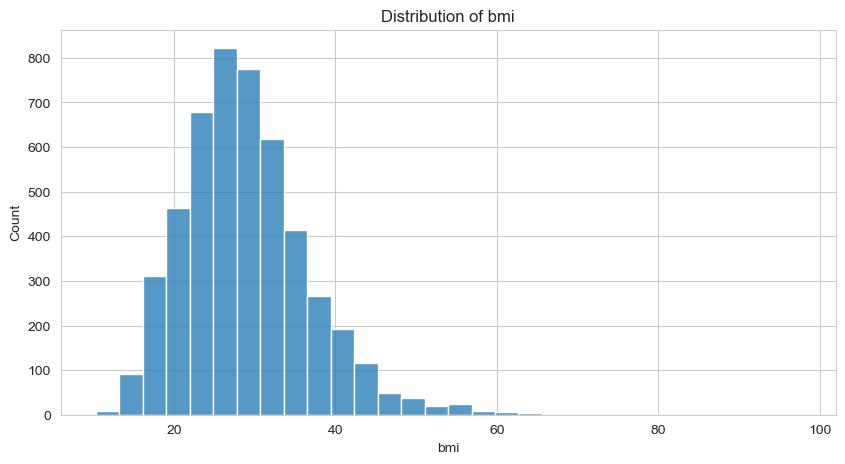

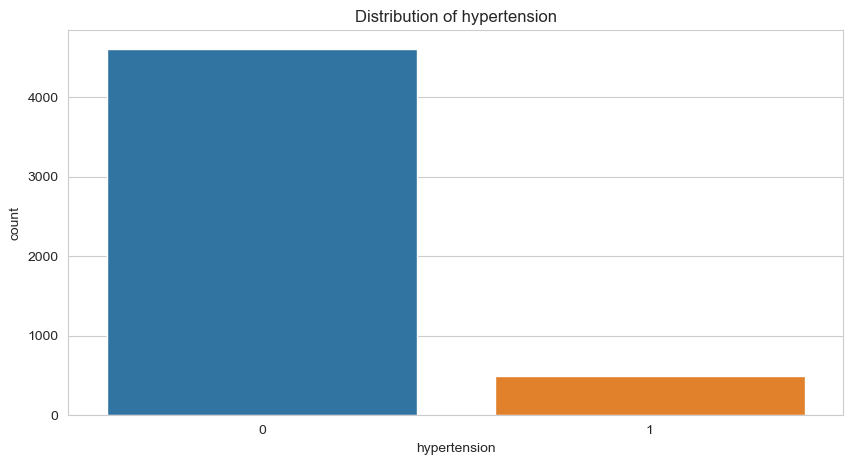

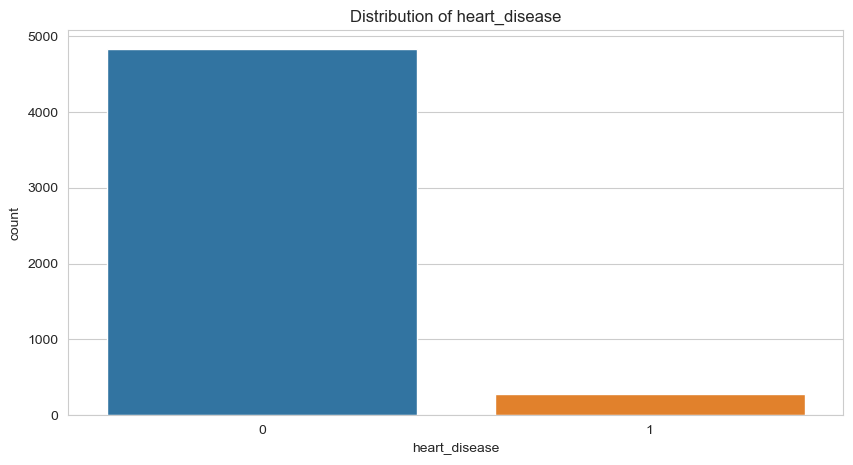

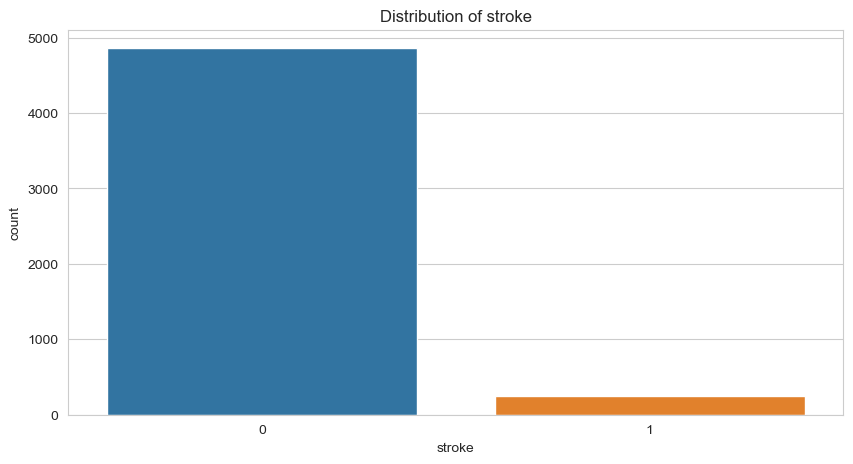

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude 'id' column and identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop('id')  # Exclude 'id'

# Separate continuous and boolean numerical columns
continuous_columns = ['age', 'avg_glucose_level', 'bmi']
boolean_columns = ['hypertension', 'heart_disease', 'stroke']

# Plot distributions for continuous numerical features
for col in continuous_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plot distributions for boolean numerical features
for col in boolean_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()


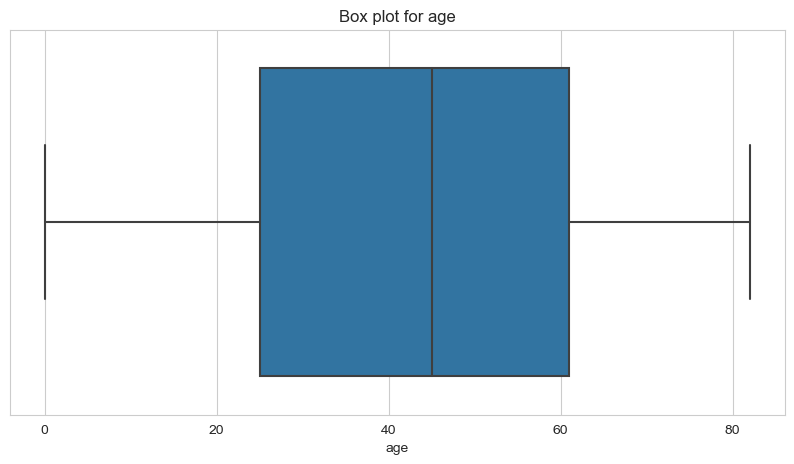

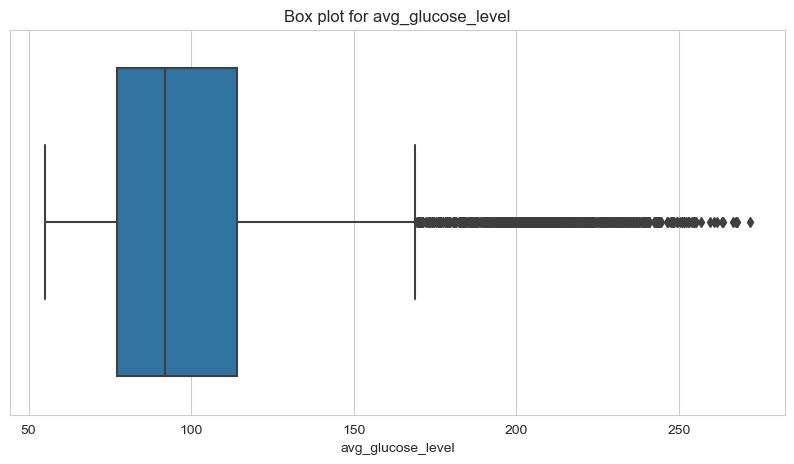

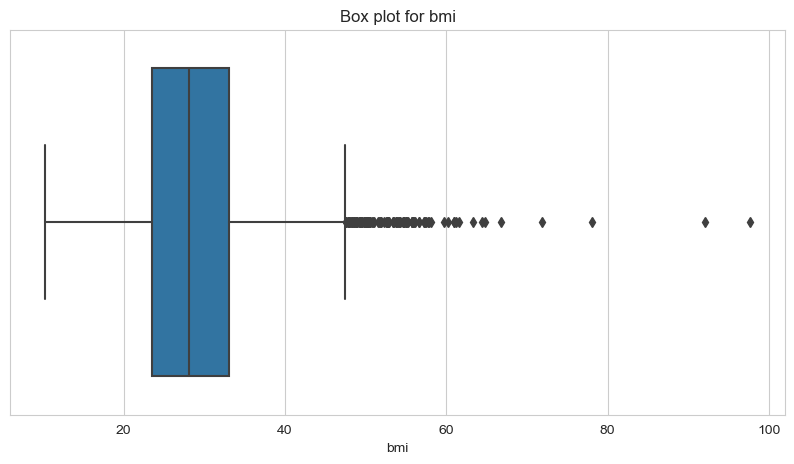

In [376]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot box plot for a given column
def plot_box(column_name):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column_name])
    plt.title(f'Box plot for {column_name}')
    plt.show()

# Columns to examine
columns_to_examine = ['age', 'avg_glucose_level', 'bmi']  # Specify the columns you want to examine

# Plot box plots for each column
for column in columns_to_examine:
    plot_box(column)


In [377]:
# Function to print summary statistics and identify outliers for a given column
def examine_outliers(column_name):
    # Summary statistics
    summary = df[column_name].describe()
    print(f"Summary statistics for {column_name}:\n{summary.round(3)}\n")
    
    # Calculate IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print("Quartiles and IQR: \n")
    print(f"Q1: {Q1.round(3)}, Q3: {Q3.round(3)}")
    print(f"IQR: {IQR.__round__(3)}")
    print(f"Outlier bounds for {column_name}: \n")
    print(f"Lower bound: {lower_bound.__round__(3)}, Upper bound: {upper_bound.__round__(3)}\n")
    
    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Number of outliers in {column_name}: {outliers.shape[0]}")
    print(f"Outliers:\n{outliers[[column_name]]}\n")

# Examine outliers for each column
for column in columns_to_examine:
    examine_outliers(column)

Summary statistics for age:
count    5110.000
mean       43.227
std        22.613
min         0.080
25%        25.000
50%        45.000
75%        61.000
max        82.000
Name: age, dtype: float64

Quartiles and IQR: 

Q1: 25.0, Q3: 61.0
IQR: 36.0
Outlier bounds for age: 

Lower bound: -29.0, Upper bound: 115.0

Number of outliers in age: 0
Outliers:
Empty DataFrame
Columns: [age]
Index: []

Summary statistics for avg_glucose_level:
count    5110.000
mean      106.148
std        45.284
min        55.120
25%        77.245
50%        91.885
75%       114.090
max       271.740
Name: avg_glucose_level, dtype: float64

Quartiles and IQR: 

Q1: 77.245, Q3: 114.09
IQR: 36.845
Outlier bounds for avg_glucose_level: 

Lower bound: 21.978, Upper bound: 169.358

Number of outliers in avg_glucose_level: 627
Outliers:
      avg_glucose_level
0                228.69
1                202.21
3                171.23
4                174.12
5                186.21
...                 ...
5061           

                        age  avg_glucose_level       bmi  hypertension  \
age                1.000000           0.238171  0.333398      0.276398   
avg_glucose_level  0.238171           1.000000  0.175502      0.174474   
bmi                0.333398           0.175502  1.000000      0.167811   
hypertension       0.276398           0.174474  0.167811      1.000000   
heart_disease      0.263796           0.161857  0.041357      0.108306   
stroke             0.245257           0.131945  0.042374      0.127904   

                   heart_disease    stroke  
age                     0.263796  0.245257  
avg_glucose_level       0.161857  0.131945  
bmi                     0.041357  0.042374  
hypertension            0.108306  0.127904  
heart_disease           1.000000  0.134914  
stroke                  0.134914  1.000000  


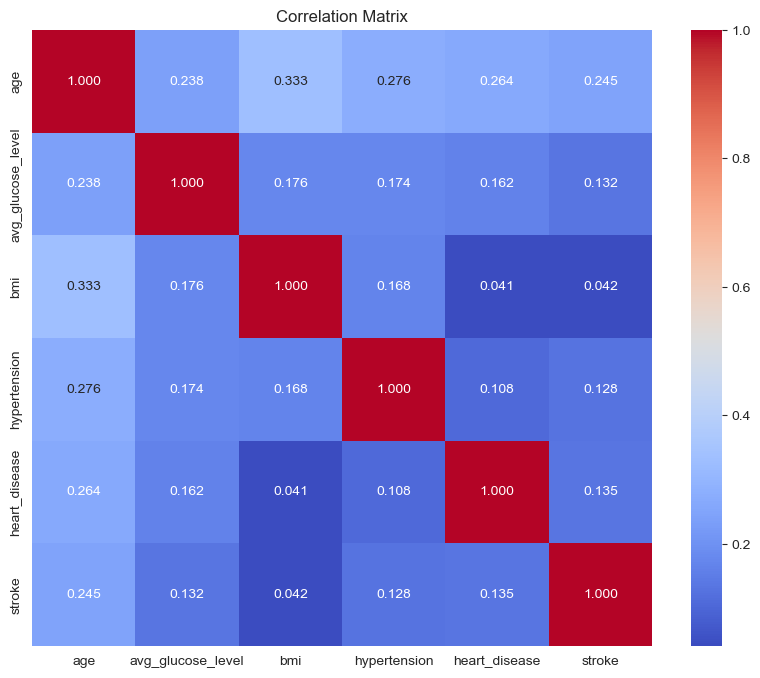

In [378]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select the subset of columns
subset_df = df[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']]

# Calculate the correlation matrix for the selected subset
correlation_matrix = subset_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix')
plt.show()


In [379]:
# Strongest correlations with 'Total conversion'
strong_correlations = correlation_matrix['stroke'].sort_values(ascending=False)
print(strong_correlations)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
Name: stroke, dtype: float64
